In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
import os
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [36]:
file_str = ['ground_truth_{}','particle_uncertainty_truth_{}']
params = ["0.000000.csv","0.050000.csv","0.100000.csv","0.150000.csv","0.200000.csv","0.250000.csv","0.300000.csv","0.350000.csv","0.400000.csv","0.450000.csv","0.500000.csv",
"0.550000.csv","0.600000.csv","0.650000.csv","0.700000.csv","0.750000.csv","0.800000.csv","0.850000.csv","0.900000.csv","0.950000.csv"]


original_dfs = []

for st in file_str:
    for val in params:
        if('particle_uncertainty_truth' in st and val in "0.500000.csv"):
            continue
        fh = st.format(val)
        df = pd.read_csv(fh,header=None)
        
        df =df.rename(columns={0:'time_str',1:'time_taken_lec',2:'time_taken_safety_controller',3:'area'})
        df['parameter_uncertainty']  = float(val.replace(".csv",""))
        df['mode'] = st[:-3]
        df = df.tail(30)
        original_dfs.append(df)
        
dfs = pd.concat(original_dfs)
        
        


In [37]:
dfs.groupby(['mode','parameter_uncertainty']).median()

time_taken_lec  \
mode                       parameter_uncertainty                   
ground_truth               0.00                         0.799483   
                           0.05                         0.782686   
                           0.10                         0.801200   
                           0.15                         0.762620   
                           0.20                         0.633876   
                           0.25                         0.564203   
                           0.30                         0.453303   
                           0.35                         0.385254   
                           0.40                         0.366932   
                           0.45                         0.376889   
                           0.50                         0.278576   
                           0.55                         0.260464   
                           0.60                         0.233911   
                           0.65                         0.245837   
                           0.70                         0.222065   
                           0.75                         0.219720   
                           0.80                         0.201962   
                           0.85                         0.289213   
                           0.90                         0.308783   
                           0.95                         0.319985   
particle_uncertainty_truth 0.00                         0.772892   
                           0.05                         0.729191   
                           0.10                         0.730140   
                           0.15                         0.651565   
                           0.20                         0.576231   
                           0.25                         0.522364   
                           0.30                         0.415730   
                           0.35                         0.325449   
                           0.40                         0.175965   
                           0.45                         0.016091   
                           0.55                         0.002387   
                           0.60                         0.000000   
                           0.65                         0.000000   
                           0.70                         0.000000   
                           0.75                         0.000000   
                           0.80                         0.000000   
                           0.85                         0.000000   
                           0.90                         0.000000   
                           0.95                         0.000000   

                                                  time_taken_safety_controller  \
mode                       parameter_uncertainty                                 
ground_truth               0.00                                       0.200517   
                           0.05                                       0.217314   
                           0.10                                       0.198800   
                           0.15                                       0.237380   
                           0.20                                       0.366125   
                           0.25                                       0.435798   
                           0.30                                       0.546697   
                           0.35                                       0.614746   
                           0.40                                       0.633068   
                           0.45                                       0.623111   
                           0.50                                       0.721424   
                           0.55                                       0.739537   
                           0.60                                       0.766089   
                           0.65

In [38]:
median_res = dfs.groupby(['mode','parameter_uncertainty']).median().reset_index()
median_gt = median_res[median_res['mode'] == 'ground_truth']
median_gt['percent_change_in_size_of_reachset'] = round((median_gt['area'] - median_gt.iloc[0]['area'])/median_gt.iloc[0]['area'] * 100,2)
median_pu = median_res[median_res['mode'] == 'particle_uncertainty_truth']
median_pu['percent_change_in_size_of_reachset'] = round((median_pu['area'] - median_pu.iloc[0]['area'])/median_pu.iloc[0]['area'] * 100,2)

In [39]:
median_gt.head(5)

,mode,parameter_uncertainty,time_taken_lec,time_taken_safety_controller,area,percent_change_in_size_of_reachset
0,ground_truth,0.00,0.799483,0.200517,2.902145,0.00
1,ground_truth,0.05,0.782686,0.217314,4.875480,68.00
2,ground_truth,0.10,0.801200,0.198800,7.454125,156.85
3,ground_truth,0.15,0.762620,0.237380,10.557350,263.78
4,ground_truth,0.20,0.633876,0.366125,14.554050,401.49


In [40]:
median_pu.head(5)

,mode,parameter_uncertainty,time_taken_lec,time_taken_safety_controller,area,percent_change_in_size_of_reachset
20,particle_uncertainty_truth,0.00,0.772892,0.227108,10.14765,0.00
21,particle_uncertainty_truth,0.05,0.729191,0.270809,12.43400,22.53
22,particle_uncertainty_truth,0.10,0.730140,0.269860,16.22930,59.93
23,particle_uncertainty_truth,0.15,0.651565,0.348435,20.30065,100.05
24,particle_uncertainty_truth,0.20,0.576231,0.423769,23.53790,131.95


###  Ground Truth

No handles with labels found to put in legend.


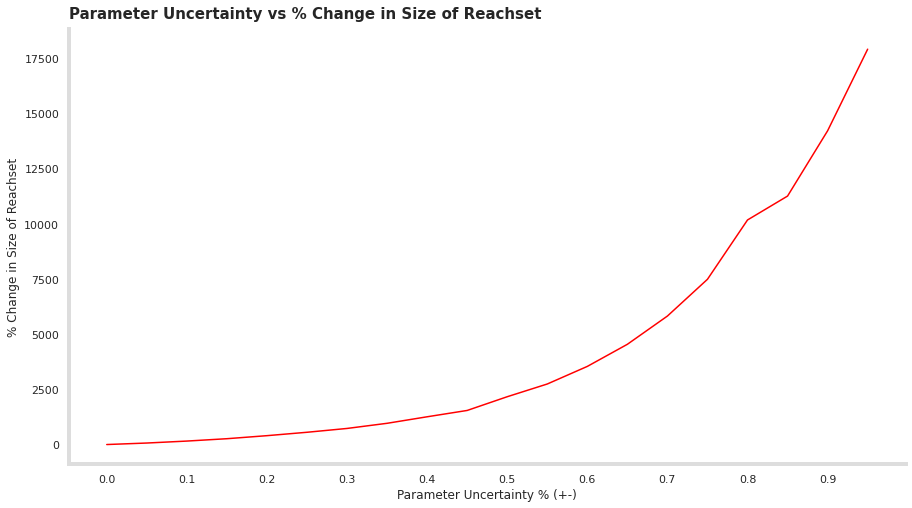

In [41]:
var1 = 'percent_change_in_size_of_reachset'


plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y=var1,color='red')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12


_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset",loc='left',pad=11.0,fontweight="bold",fontsize=15)

plt.setp(ax.spines.values(), linewidth=4)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title
_ = plt.xticks(np.arange(0, 1.0, 0.1))


### When you Incorporate Position Uncertainty

No handles with labels found to put in legend.


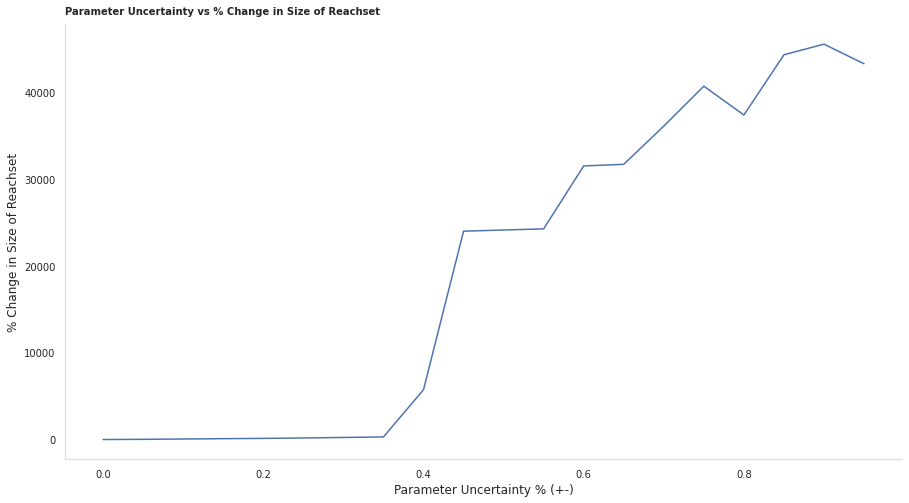

In [42]:
var1 = 'percent_change_in_size_of_reachset'

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y=var1)
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset",loc='left',pad=10.0,fontweight="bold")

### Both 

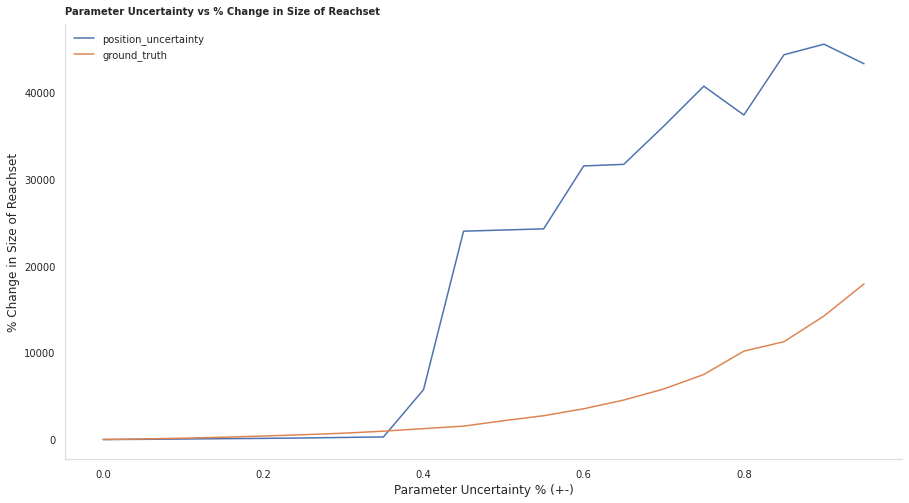

In [43]:
var1 = 'percent_change_in_size_of_reachset'


plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y=var1,label="position_uncertainty")
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y=var1,label="ground_truth")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset",loc='left',pad=10.0,fontweight="bold")

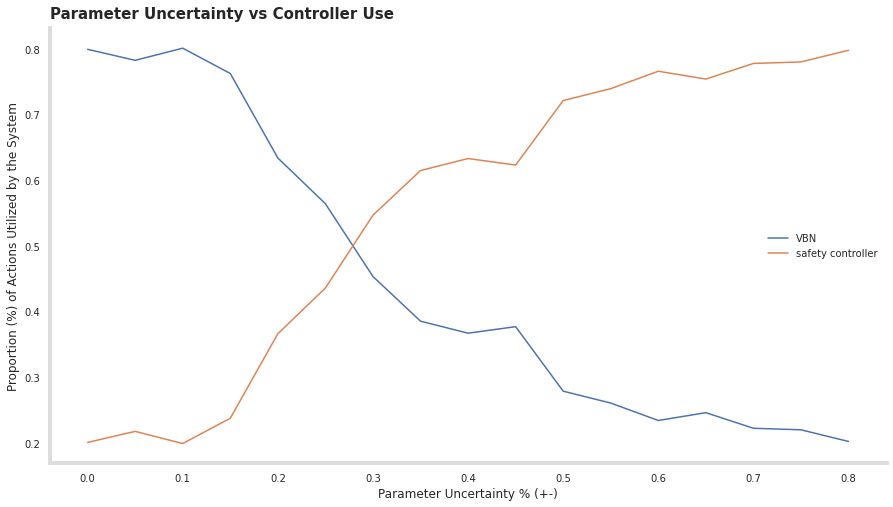

In [44]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_gt[median_gt['parameter_uncertainty']<0.85], x="parameter_uncertainty",y="time_taken_lec", label='VBN')
ax = sns.lineplot(data=median_gt[median_gt['parameter_uncertainty']<0.85], x="parameter_uncertainty",y="time_taken_safety_controller",label='safety controller')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Proportion (%) of Actions Utilized by the System")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Controller Use",loc='left',pad=10.0,fontweight="bold",fontsize=15)

plt.setp(ax.spines.values(), linewidth=4)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title


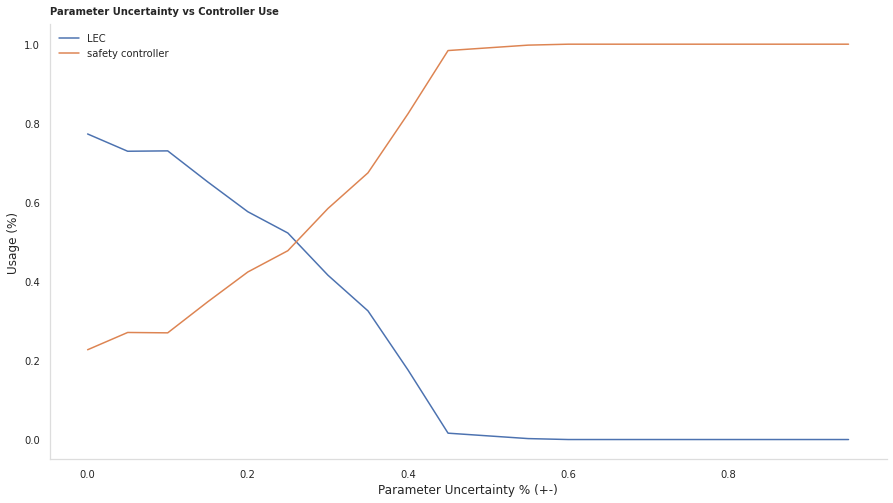

In [45]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="time_taken_lec", label='LEC')
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="time_taken_safety_controller",label='safety controller')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Usage (%)")

_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Controller Use",loc='left',pad=10.0,fontweight="bold")

### Experiments Varying Uncertainty and Reachability Horizon

In [46]:
params = ["0.000000","0.050000","0.100000","0.150000","0.200000","0.250000","0.300000","0.350000","0.400000","0.450000","0.500000",
"0.550000","0.600000","0.650000","0.700000","0.750000","0.800000","0.850000","0.900000","0.950000"]

reachtime = ["0.500000","0.600000","0.700000","0.800000","0.900000","1.000000","1.100000", "1.200000","1.300000",
"1.400000","1.500000","1.600000","1.700000","1.800000","1.800000","1.900000","2.000000"]

file_str = "ground_truth_{}_{}_.csv"
original_dfs = []
for uncp in params:
    for rt in reachtime: 
        filepath = file_str.format(uncp,rt)
        
        try:
            df = pd.read_csv(filepath,header=None)
            df = df.rename(columns={0:'time_str',1:'time_taken_lec',2:'time_taken_safety_controller',3:'area'})
            df['parameter_uncertainty']  = uncp
            df['reach_time']  = rt
            original_dfs.append(df)

        except Exception as e:
            continue
            #print(filepath,e)
            
reach_uncertainty = dfs = pd.concat(original_dfs)


In [47]:
ru_sorted = reach_uncertainty.sort_values(by=["parameter_uncertainty","reach_time"])
ru_sorted

,time_str,time_taken_lec,time_taken_safety_controller,area,parameter_uncertainty,reach_time
0,22/03/2022/14:45:24,0.987654,0.012346,3.29544,0.000000,0.500000
1,22/03/2022/14:46:15,0.923977,0.076023,3.07730,0.000000,0.500000
2,22/03/2022/14:47:34,0.985014,0.014986,3.06432,0.000000,0.500000
3,22/03/2022/14:48:20,0.912088,0.087912,3.12691,0.000000,0.500000
4,22/03/2022/14:49:07,0.859107,0.140893,3.08200,0.000000,0.500000
...,...,...,...,...,...,...
3,27/03/2022/09:34:38,0.071661,0.928339,10823.80000,0.900000,2.000000
4,27/03/2022/09:36:49,0.165595,0.834405,9872.37000,0.900000,2.000000
5,27/03/2022/09:39:00,0.070090,0.929910,10606.50000,0.900000,2.000000
6,27/03/2022/09:41:12,0.167072,0.832928,11330.80000,0.900000,2.000000


In [67]:
ru_sorted = reach_uncertainty.groupby(['parameter_uncertainty','reach_time']).median()
ru = reach_uncertainty.groupby(['parameter_uncertainty','reach_time']).median()
ru['percent_change_in_size_of_reachset'] = round((ru['area'] - ru_sorted.iloc[0]['area'])/ru_sorted.iloc[0]['area'] * 100,2)
ru

time_taken_lec  \
parameter_uncertainty reach_time                   
0.000000              0.500000          0.918033   
                      0.600000          0.867522   
                      0.700000          0.896238   
                      0.800000          0.869565   
                      0.900000          0.751115   
...                                          ...   
0.900000              1.600000          0.183142   
                      1.700000          0.168430   
                      1.800000          0.166467   
                      1.900000          0.150234   
                      2.000000          0.160699   

                                  time_taken_safety_controller          area  \
parameter_uncertainty reach_time                                               
0.000000              0.500000                        0.081968      3.063685   
                      0.600000                        0.132478      2.973180   
                      0.700000                        0.103762      2.944375   
                      0.800000                        0.130435      2.998950   
                      0.900000                        0.248886      2.959695   
...                                                        ...           ...   
0.900000              1.600000                        0.816858   4280.655000   
                      1.700000                        0.831569   5482.590000   
                      1.800000                        0.833533   7141.740000   
                      1.900000                        0.849767   8059.580000   
                      2.000000                        0.839301  10500.700000   

                                  percent_change_in_size_of_reachset  
parameter_uncertainty reach_time                                      
0.000000              0.500000                                  0.00  
                      0.600000                                 -2.95  
                      0.700000                                 -3.89  
                      0.800000                                 -2.11  
                      0.900000                                 -3.39  
...                                                              ...  
0.900000              1.600000                             139622.43  
                      1.700000                             178854.10  
                      1.800000                             233009.47  
                      1.900000                             262968.17  
                      2.000000                             342647.38  

[304 rows x 4 columns]

In [78]:
ru_plot = ru.reset_index()
ru_plot['reach_time'] = ru_plot["reach_time"].apply(float)
ru_plot['parameter_uncertainty'] = ru_plot['parameter_uncertainty'].apply(float)
ru_plot = round(ru_plot,2)
ru_plot.head()

,parameter_uncertainty,reach_time,time_taken_lec,time_taken_safety_controller,area,percent_change_in_size_of_reachset
0,0.0,0.5,0.92,0.08,3.06,0.00
1,0.0,0.6,0.87,0.13,2.97,-2.95
2,0.0,0.7,0.90,0.10,2.94,-3.89
3,0.0,0.8,0.87,0.13,3.00,-2.11
4,0.0,0.9,0.75,0.25,2.96,-3.39


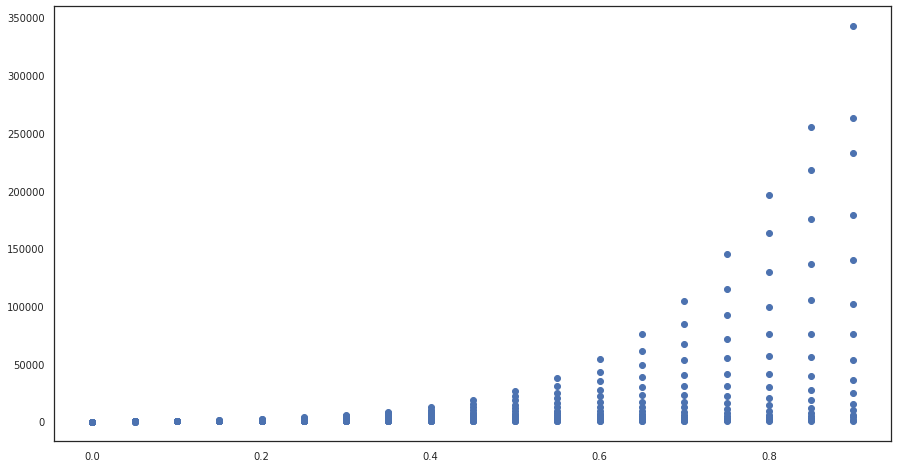

In [79]:
plt.figure(figsize=(15,8))

ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.scatter(ru_plot["parameter_uncertainty"], ru_plot["percent_change_in_size_of_reachset"])
#sns.despine(left=False, bottom=False, right=True)

# ax.set_xlabel("parameter_uncertainty")
# ax.set_ylabel("reach_time")
# ax.set_zlabel("percent_change_in_size_of_reachset")
# _= plt.legend(loc='best',frameon=False)

# _= plt.ylabel("Usage (%)")

# _= plt.xlabel('Parameter Uncertainty % (+-)')
# _= plt.title("Parameter Uncertainty vs Controller Use",loc='left',pad=10.0,fontweight="bold")

<Figure size 1080x576 with 0 Axes>

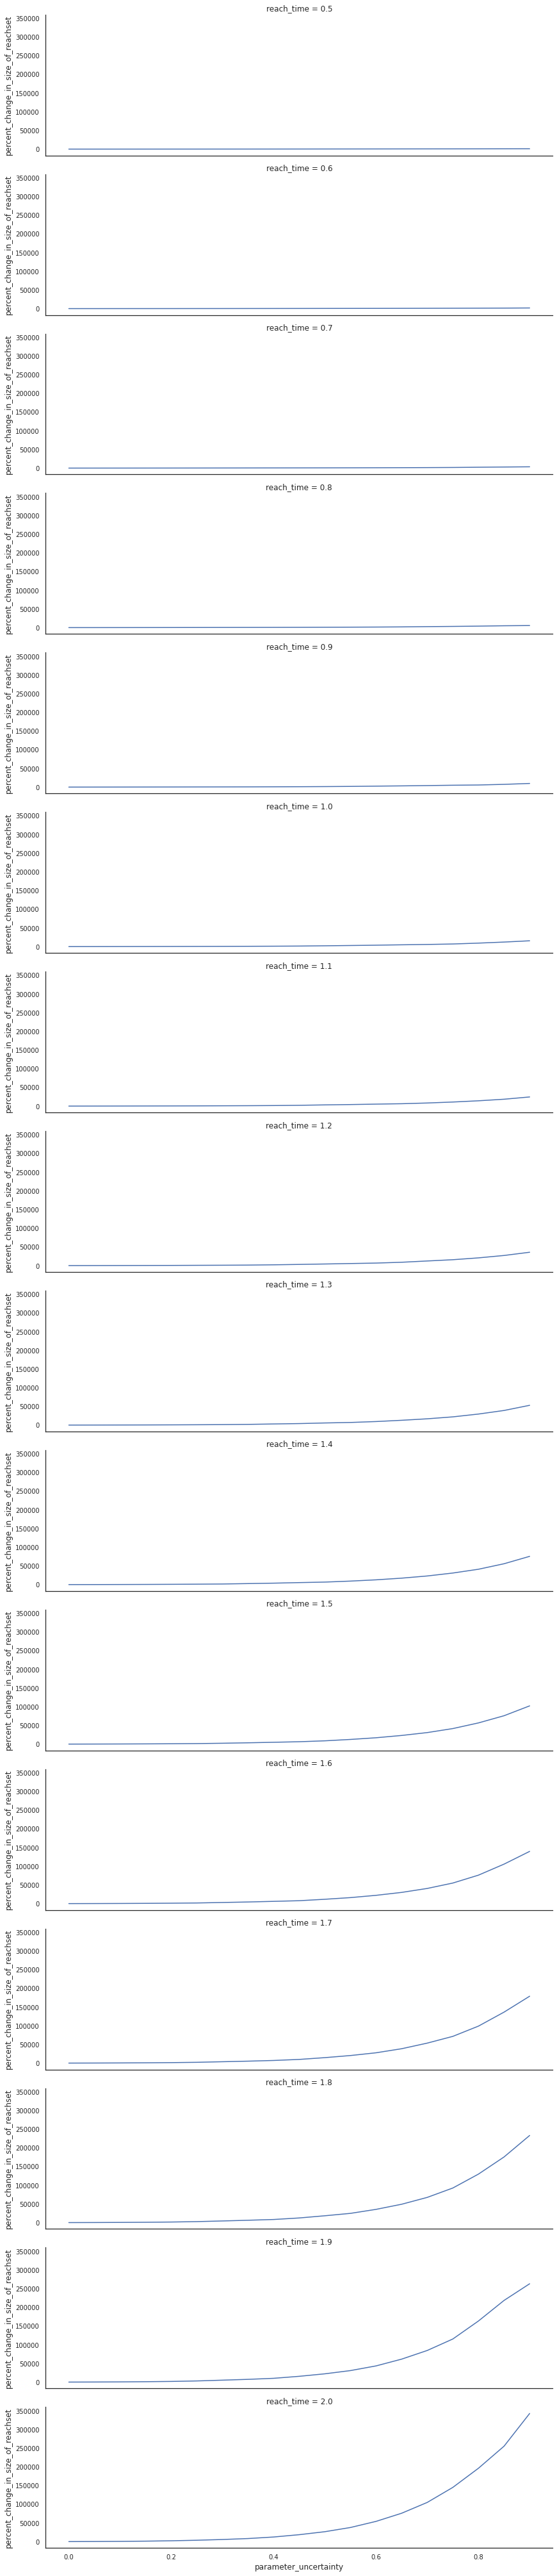

In [80]:
plt.figure(figsize=(15,8))
g = sns.FacetGrid(ru_plot, row="reach_time",height=3.5,aspect=3.5)
g.map(sns.lineplot, "parameter_uncertainty", "percent_change_in_size_of_reachset")

In [81]:
labs = {"percent_change_in_size_of_reachset":"% Change in Size of Reachset (Area)",
       "reach_time":"Reach Time (s)","parameter_uncertainty":"Paramter Uncertainty (%)"}

fig = px.scatter_3d(ru_plot, x="reach_time", y="parameter_uncertainty", 
                    z="percent_change_in_size_of_reachset",
                    color='percent_change_in_size_of_reachset',
                   labels=labs,width=1500, height=1000)
fig.show()

In [82]:
labs = {"percent_change_in_size_of_reachset":"% Change in Size of Reachset (Area)",
       "reach_time":"Reach Time (s)","parameter_uncertainty":"Paramter Uncertainty (%)","time_taken_lec":"ML Controller Use (%)"}

fig = px.scatter_3d(ru_plot, x="reach_time", y="parameter_uncertainty", 
                    z="time_taken_lec",
                    color="time_taken_lec",
                   labels=labs,width=1500, height=1000)
fig.show()